# Adding Blank Space in Completion Data for Petrel

In [ ]:
import pandas as pd
import numpy as np
import timeit

start = timeit.default_timer()

# read data
df = pd.read_excel(r"C:\Users\Lapi-ITB\komplesion4.xlsx",sheet_name="Sheet1")
df.info()

# drop duplicates and reset index
df = df.drop_duplicates()
df = df.reset_index(drop = True)

# adding blank row for specified index 
for i in df.index:
    if "perforation" in df['UNITS FIELD'][i+1] and "squeeze" in df['UNITS FIELD'][i+2]:
        df.loc[i+1.5] = ""
    elif "squeeze" in df['UNITS FIELD'][i+1] and "WELLNAME" in df['UNITS FIELD'][i+2]:
        df.loc[i+1.5] = ""
    elif "perforation" in df['UNITS FIELD'][i+1] and "WELLNAME" in df['UNITS FIELD'][i+2]:
        df.loc[i+1.5]= ""
    elif "WELLNAME" in df['UNITS FIELD'][i+1] and "WELLNAME" in df['UNITS FIELD'][i+2]:
        df.loc[i+1.5]= ""
    elif "plug" in df['UNITS FIELD'][i+1] and "WELLNAME" in df['UNITS FIELD'][i+2]:
        df.loc[i+1.5]= ""
    else:
        continue

    if i == 144023.0:
        break

df = df.sort_index().reset_index(drop=True)

# convert dataframe to excel file
df.to_excel("Komplesi Minus 627.xlsx")

stop = timeit.default_timer()
print('Time: ', stop - start)

# Adding Blank Space in Production and Injection Data 

In [ ]:
import pandas as pd
import timeit

start = timeit.default_timer()

# read data
df = pd.read_excel(r"D:\GG\MINAS\Production\AddProdInj.xlsx",sheet_name="Sheet1")
df.info()

# adding blank row for specified index 
for i in df.index:
    if "*NAME" in df['*FIELD'][i]:
        df.loc[i-0.5] = ""
    else:
        continue

    if i == 12107.0:
        break

df = df.sort_index().reset_index(drop=True)

# convert dataframe to excel file
df.to_excel(r"D:\GG\MINAS\Production\AddProdInj_with_Blanks.xlsx")

stop = timeit.default_timer()
print('Time: ', stop - start)

# Clearing Specific Well with Its Completion Data in Original Completion Data

In [ ]:
import pandas as pd
import openpyxl

# read the data
well_628 = pd.read_excel("D:\GG\MINAS\istMSSM1.xlsx", sheet_name="Sheet5")
df = pd.read_excel("D:\GG\MINAS\komplesi 1984.xlsx", sheet_name="Sheet1")

# drop header and NaN
df = df.drop(0, axis=0)
df = df.dropna()
df = df.reset_index(drop=True)
df

# initialization iteration variable x and y 
x = 0
y = 0

while x <= 199033:

    # stopping looping when all 628 well removed
    if y==len(well_628):
        break

    # drop the 628 well
    elif well_628["uwi"][y] in str(df["UNITS FIELD"][x]):

        # drop line that contain well name   
        df = df.drop(index = x, axis=0)
        j = x + 1

        # drop lines that contain "perforation", "squeeze", and "plug"
        while j <= 1000000:

            if "perforation" in str(df["UNITS FIELD"][j]):
                df = df.drop(index = j, axis=0)
                x += 1
            elif "squeeze" in str(df["UNITS FIELD"][j]):
                df = df.drop(index = j, axis=0)
                x += 1
            elif "plug" in str(df["UNITS FIELD"][j]):
                df = df.drop(index = j, axis=0)
                x += 1
            else: 
                break

            j += 1

        x += 1
        y = y + 1

        # print the drop step
        print(x,y-1,well_628["uwi"][y-1])
    
    # adding iterable variable (x) by 1
    else:
        
        x += 1

df.to_excel("komplesion4.xlsx")

# Filter and Visualize RFT data by Sand and Depth

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# read the data
df = pd.read_excel("D:\GG\MINAS\Pressure Sumur Minas RFT.xlsx", sheet_name="Pressure HM Tiga")

# drop first four data 
df.drop([0,1,2,3], axis=0, inplace=True)
df = df.reset_index()

# create blank dataframe
dfx = pd.DataFrame()

# choose data that have equal or more than 2 data for the same layer and well
for i in df['UWI'].unique():
    for j in df['K'].unique():
        if len(df[(df['UWI']==i)&(df['K']==j)])>=2:
            dfa = df[(df['UWI']==i)&(df['K']==j)]
            dfx = pd.concat([dfx,dfa])

# dfx is the dataframe that contain 
dfx

# create visualization datum pressure vs depth for each well from the previous dataframe
for i in dfx['UWI'].unique():
    if len(dfx[dfx['UWI']==i]['K'].unique())>1:
        fig, ax = plt.subplots(figsize=(8,3))
        fig = sns.scatterplot(dfx[(df['UWI']==i)]['Datum Pressure'], dfx[(df['UWI']==i)]['TOP_DEPTH'], 
                            hue=dfx[(df['UWI']==i)]['K'], s=200)
        fig.plot(dfx[(df['UWI']==i)]['Datum Pressure'], dfx[(df['UWI']==i)]['TOP_DEPTH'], linestyle="--", color='black')
        ax.set_xlabel('Pres (psi)')
        ax.set_ylabel('Depth (ft)')
        plt.gca().invert_yaxis()
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top')
        ax.legend()
        ax.set_title(i, fontsize=16, y=1.0, pad=-14)
        plt.grid()
        plt.show()

# Function to Visualize Pressure vs Time from RFT Data

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create function to visualize pressure vs time (by segment)
def visualize_all(dfv):
    plt.style.use('seaborn-darkgrid')
    fig,ax = plt.subplots(figsize=(20,8))
    fig = sns.scatterplot(dfv['TEST_DATE'], dfv['DATUM PRESSURE'], s=150)
    ax.set_xlabel('Date', fontsize = 18)
    ax.set_ylabel('Pressure (psi)', fontsize = 18)
    ax.set_title("Pressure Field", fontsize = 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylim([0,1000,100])
    ax.legend(fontsize=15, ncol=3, loc="upper left")
    plt.show()

def visualize_segment(dfv):
    plt.style.use('seaborn-darkgrid')
    fig,ax = plt.subplots(figsize=(20,8))
    fig = sns.scatterplot(dfv['TEST_DATE'], dfv['DATUM PRESSURE'], s=150)
    ax.set_xlabel('Date', fontsize = 18)
    ax.set_ylabel('Pressure (psi)', fontsize = 18)
    ax.set_title('Pressure in ' + str(dfv['SEGMENT'].unique()[1]) + " Segment", fontsize = 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylim([0,1000])
    ax.legend(fontsize=15, ncol=3, loc="upper left")
    plt.show()

def visualize_sand_segment(dfv):
    plt.style.use('seaborn-darkgrid')
    fig, ax = plt.subplots(figsize=(20,8))
    fig = sns.scatterplot(dfv['MISC_TEST_DATE_1'], dfv['Datum Pressure'], s=300)
    ax.set_xlabel('Date', fontsize = 18)
    ax.set_ylabel('Pressure (psi)', fontsize = 18)
    ax.set_title('Pressure in ' + str(dfv["K"].unique()[1][2:]) + "_" + str(dfv['SEGMMENT'].unique()[1]), fontsize = 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax.legend(fontsize=15, ncol=3, loc="upper left")
    plt.show()

def visualize_sand(dfv):
    plt.style.use('seaborn-darkgrid')
    fig, ax = plt.subplots(figsize=(20,8))
    fig = sns.scatterplot(dfv['TEST_DATE'], dfv['DATUM_PRESS'], s=220)
    ax.set_xlabel('Date', fontsize = 18)
    ax.set_ylabel('Pressure (psi)', fontsize = 18)
    ax.set_title('Pressure PBU in ' + str(dfv["SURVEY_SAND"].unique()), fontsize = 25)
    plt.xticks(fontsize=20)
    plt.yticks(np.arange(0, 900, 100), fontsize=20)
    ax.legend(fontsize=15, ncol=3, loc="upper left")
    plt.show()

def visualize_sand_segment2(dfv):
    plt.style.use('seaborn-darkgrid')
    fig, ax = plt.subplots(figsize=(20,8))
    fig = sns.scatterplot(dfv['TEST_DATE'], dfv['DATUM_PRESS'], s=220)
    ax.set_xlabel('Date', fontsize = 18)
    ax.set_ylabel('Pressure (psi)', fontsize = 18)
    ax.set_title('Pressure SBHP in ' + str(dfv["SURVEY_SAND"].unique()) + "_" + str(dfv["SEGMENT"].unique()), fontsize = 25)
    plt.xticks(fontsize=20)
    plt.yticks(np.arange(0, 900, 100), fontsize=20)
    ax.legend(fontsize=15, ncol=3, loc="upper left")
    plt.show()

In [ ]:
"D:\GG\MINAS\Pressure\MFFM RFT Pressure Final.xlsx"

# Processing RFT data by segment

from openpyxl import load_workbook
import pandas as pd
import xlsxwriter
import timeit
import warnings
warnings.filterwarnings("ignore")

# read the data
dfz = pd.read_excel("D:\GG\MINAS\Pressure Sumur Minas RFT.xlsx", sheet_name="Pressure HM Tiga")
path = "D:\GG\Segment Rev.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = "openpyxl")
writer.book = book

# create data in .xlsx format for input to the .vol format converter
for i in dfz["SEGMMENT"].unique():
    if i != "ALL":
        df = pd.read_excel("D:\GG\MINAS\Pressure Sumur Minas RFT.xlsx", sheet_name = "Pressure HM Tiga")
        df = df.groupby(["SEGMMENT","UWI","MISC_TEST_DATE_1"]).mean().reset_index()
        df = df[((df["SEGMMENT"]==i)|(df["SEGMMENT"]=="ALL"))]
        visualize_segment(df)
        dfk = pd.DataFrame()
        dfk['Name'] = df['UWI']
        dfk['Day'] = df['MISC_TEST_DATE_1'].dt.day
        dfk['Month'] = df['MISC_TEST_DATE_1'].dt.month
        dfk['Year'] = df['MISC_TEST_DATE_1'].dt.year
        dfk['Pressure'] = df['Datum Pressure']
        dfk.loc[dfk['Name'].str.contains("MINA", case=False), "Name"] = str(i)
        dfk.loc[len(dfk.index)] = ["1","","","",""]
        dfk.to_excel(writer, sheet_name = str(i), index = False)
    else:
        pass

writer.save()
writer.close()

# convert excel to .vol format
start = timeit.default_timer()

wb = xlsxwriter.Workbook(r"D:\GG\Pressure by Segment.xlsx")

for segment in ["MAIN","NW"]:
    sheet1 = wb.add_worksheet(str(segment))

    row_count = 3
    df_pressure = pd.read_excel(path, sheet_name=str(segment))

    sheet1.write(0, 0, '*FIELD')
    sheet1.write(1, 0, '*DAY')
    sheet1.write(1, 1, '*MONTH')
    sheet1.write(1, 2, '*YEAR')
    sheet1.write(1, 3, '*PRESS')
    sheet1.write(2, 0, '*NAME')

    for i in df_pressure.index :
        sheet1.write(row_count, 0, int(df_pressure['Day'][i]))
        sheet1.write(row_count, 1, int(df_pressure['Month'][i]))
        sheet1.write(row_count, 2, int(df_pressure['Year'][i]))
        sheet1.write(row_count, 3, int(df_pressure['Pressure'][i]))

        if i == 1 :
            sheet1.write(2, 1, '"'+str(df_pressure['Name'][i])+'"')
        
        if str(df_pressure['Name'][i+1]) == '1' : 
            break

        if str(df_pressure['Name'][i]) != str(df_pressure['Name'][i+1]) :
            row_count+=2
            sheet1.write(row_count, 0, '*NAME')
            sheet1.write(row_count, 1, '"'+str(df_pressure['Name'][i+1])+'"')
            row_count+=1

        elif str(df_pressure['Name'][i]) == str(df_pressure['Name'][i+1]) :
            row_count+=1

wb.close()

stop = timeit.default_timer()
print('Time: ', stop - start)

# Find Average Pressure from RFT data and Convert It to .VOL format (by Segment)

In [ ]:
# Processing RFT data by segment

from openpyxl import load_workbook
import pandas as pd
import xlsxwriter
import timeit
import warnings
warnings.filterwarnings("ignore")

# read the data
dfz = pd.read_excel("D:\GG\MINAS\Pressure Sumur Minas RFT.xlsx", sheet_name="Pressure HM Tiga")
path = "D:\GG\Segment Rev.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = "openpyxl")
writer.book = book

# create data in .xlsx format for input to the .vol format converter
for i in dfz["SEGMMENT"].unique():
    if i != "ALL":
        df = pd.read_excel("D:\GG\MINAS\Pressure Sumur Minas RFT.xlsx", sheet_name = "Pressure HM Tiga")
        df = df.groupby(["SEGMMENT","UWI","MISC_TEST_DATE_1"]).mean().reset_index()
        df = df[((df["SEGMMENT"]==i)|(df["SEGMMENT"]=="ALL"))]
        visualize_segment(df)
        dfk = pd.DataFrame()
        dfk['Name'] = df['UWI']
        dfk['Day'] = df['MISC_TEST_DATE_1'].dt.day
        dfk['Month'] = df['MISC_TEST_DATE_1'].dt.month
        dfk['Year'] = df['MISC_TEST_DATE_1'].dt.year
        dfk['Pressure'] = df['Datum Pressure']
        dfk.loc[dfk['Name'].str.contains("MINA", case=False), "Name"] = str(i)
        dfk.loc[len(dfk.index)] = ["1","","","",""]
        dfk.to_excel(writer, sheet_name = str(i), index = False)
    else:
        pass

writer.save()
writer.close()

# convert excel to .vol format
start = timeit.default_timer()

wb = xlsxwriter.Workbook(r"D:\GG\Pressure by Segment.xlsx")

for segment in ["MAIN","NW"]:
    sheet1 = wb.add_worksheet(str(segment))

    row_count = 3
    df_pressure = pd.read_excel(path, sheet_name=str(segment))

    sheet1.write(0, 0, '*FIELD')
    sheet1.write(1, 0, '*DAY')
    sheet1.write(1, 1, '*MONTH')
    sheet1.write(1, 2, '*YEAR')
    sheet1.write(1, 3, '*PRESS')
    sheet1.write(2, 0, '*NAME')

    for i in df_pressure.index :
        sheet1.write(row_count, 0, int(df_pressure['Day'][i]))
        sheet1.write(row_count, 1, int(df_pressure['Month'][i]))
        sheet1.write(row_count, 2, int(df_pressure['Year'][i]))
        sheet1.write(row_count, 3, int(df_pressure['Pressure'][i]))

        if i == 1 :
            sheet1.write(2, 1, '"'+str(df_pressure['Name'][i])+'"')
        
        if str(df_pressure['Name'][i+1]) == '1' : 
            break

        if str(df_pressure['Name'][i]) != str(df_pressure['Name'][i+1]) :
            row_count+=2
            sheet1.write(row_count, 0, '*NAME')
            sheet1.write(row_count, 1, '"'+str(df_pressure['Name'][i+1])+'"')
            row_count+=1

        elif str(df_pressure['Name'][i]) == str(df_pressure['Name'][i+1]) :
            row_count+=1

wb.close()

stop = timeit.default_timer()
print('Time: ', stop - start)

# Find Max Pressure from RFT data and Convert It to .VOL format (by Sand by Segment)

In [ ]:
# Processing RFT data by sand and by segment

from openpyxl import load_workbook
import pandas as pd
import xlsxwriter
import timeit
import warnings
warnings.filterwarnings("ignore")

# read the data
dfz = pd.read_excel("D:\GG\MINAS\Pressure Sumur Minas RFT.xlsx", sheet_name="Pressure HM Tiga")
path = "D:\GG\Sand and Segment Rev.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = "openpyxl") 
writer.book = book

# create data in .xlsx format for input to the .vol format converter
for i in dfz["SEGMMENT"].unique()[1:]:
    for j in dfz["K"].unique()[1:8]:
        if i == "NW" and j == "BKX":
            pass
        else: 
            df = pd.read_excel("D:\GG\MINAS\Pressure Sumur Minas RFT.xlsx", sheet_name = "Pressure HM Tiga")
            df = df.groupby(["SEGMMENT","K","UWI","MISC_TEST_DATE_1"]).max().reset_index()
            df = df[((df["SEGMMENT"]==i)|(df["SEGMMENT"]=="ALL")) & ((df["K"]==j)|(df["K"]=="All"))]
            visualize_sand_segment(df)
            dfk = pd.DataFrame()
            dfk['Name'] = df['UWI']
            dfk['Day'] = df['MISC_TEST_DATE_1'].dt.day
            dfk['Month'] = df['MISC_TEST_DATE_1'].dt.month
            dfk['Year'] = df['MISC_TEST_DATE_1'].dt.year
            dfk['Pressure'] = df['Datum Pressure']
            dfk.loc[dfk['Name'].str.contains("MINA", case=False), "Name"] = str(j)[2:] + "_" + str(i) 
            dfk.loc[len(dfk.index)] = ["1","","","",""]
            dfk.to_excel(writer, sheet_name = str(j)[2:] + "_" + str(i), index = False)
 
writer.save()
writer.close()

# convert excel to .vol format
start = timeit.default_timer()

wb = xlsxwriter.Workbook(r"D:\GG\Pressure by Sand and by Segment.xlsx")

for segment in dfz["SEGMMENT"].unique()[1:]:
    for sand in dfz["K"].unique()[1:8]:
        if segment == "NW" and sand == "BKX":
            pass
        else: 
            sheet1 = wb.add_worksheet(str(sand)[2:] + "_" + str(segment))

            row_count = 3
            df_pressure = pd.read_excel(path, sheet_name = str(sand)[2:] + "_" + str(segment))

            sheet1.write(0, 0, '*FIELD')
            sheet1.write(1, 0, '*DAY')
            sheet1.write(1, 1, '*MONTH')
            sheet1.write(1, 2, '*YEAR')
            sheet1.write(1, 3, '*PRESS')
            sheet1.write(2, 0, '*NAME')

            for i in df_pressure.index :
                sheet1.write(row_count, 0, int(df_pressure['Day'][i]))
                sheet1.write(row_count, 1, int(df_pressure['Month'][i]))
                sheet1.write(row_count, 2, int(df_pressure['Year'][i]))
                sheet1.write(row_count, 3, int(df_pressure['Pressure'][i]))

                if i == 1 :
                    sheet1.write(2, 1, '"'+str(df_pressure['Name'][i])+'"')
                
                if str(df_pressure['Name'][i+1]) == '1' : 
                    break

                if str(df_pressure['Name'][i]) != str(df_pressure['Name'][i+1]) :
                    row_count+=2
                    sheet1.write(row_count, 0, '*NAME')
                    sheet1.write(row_count, 1, '"'+str(df_pressure['Name'][i+1])+'"')
                    row_count+=1

                elif str(df_pressure['Name'][i]) == str(df_pressure['Name'][i+1]) :
                    row_count+=1

wb.close()

stop = timeit.default_timer()
print('Time: ', stop - start)

# Find Average Pressure from RFT data and Convert It to .VOL format (by Segment)

In [ ]:
# Processing RFT data by sand and by segment

from openpyxl import load_workbook
import pandas as pd
import xlsxwriter
import timeit
import warnings
warnings.filterwarnings("ignore")

# read the data
dfz = pd.read_excel("D:\GG\MINAS\Pressure Sumur Minas RFT.xlsx", sheet_name="Pressure HM Tiga")
path = "D:\GG\Sand and Segment Rev.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = "openpyxl") 
writer.book = book

# create data in .xlsx format for input to the .vol format converter
for i in dfz["SEGMMENT"].unique()[1:]:
    for j in dfz["K"].unique()[1:8]:
        if i == "NW" and j == "BKX":
            pass
        else: 
            df = pd.read_excel("D:\GG\MINAS\Pressure Sumur Minas RFT.xlsx", sheet_name = "Pressure HM Tiga")
            df = df.groupby(["SEGMMENT","K","UWI","MISC_TEST_DATE_1"]).max().reset_index()
            df = df[((df["SEGMMENT"]==i)|(df["SEGMMENT"]=="ALL")) & ((df["K"]==j)|(df["K"]=="All"))]
            visualize_sand_segment(df)
            dfk = pd.DataFrame()
            dfk['Name'] = df['UWI']
            dfk['Day'] = df['MISC_TEST_DATE_1'].dt.day
            dfk['Month'] = df['MISC_TEST_DATE_1'].dt.month
            dfk['Year'] = df['MISC_TEST_DATE_1'].dt.year
            dfk['Pressure'] = df['Datum Pressure']
            dfk.loc[dfk['Name'].str.contains("MINA", case=False), "Name"] = str(j)[2:] + "_" + str(i) 
            dfk.loc[len(dfk.index)] = ["1","","","",""]
            dfk.to_excel(writer, sheet_name = str(j)[2:] + "_" + str(i), index = False)
 
writer.save()
writer.close()

# convert excel to .vol format
start = timeit.default_timer()

wb = xlsxwriter.Workbook(r"D:\GG\Pressure by Sand and by Segment.xlsx")

for segment in dfz["SEGMMENT"].unique()[1:]:
    for sand in dfz["K"].unique()[1:8]:
        if segment == "NW" and sand == "BKX":
            pass
        else: 
            sheet1 = wb.add_worksheet(str(sand)[2:] + "_" + str(segment))

            row_count = 3
            df_pressure = pd.read_excel(path, sheet_name = str(sand)[2:] + "_" + str(segment))

            sheet1.write(0, 0, '*FIELD')
            sheet1.write(1, 0, '*DAY')
            sheet1.write(1, 1, '*MONTH')
            sheet1.write(1, 2, '*YEAR')
            sheet1.write(1, 3, '*PRESS')
            sheet1.write(2, 0, '*NAME')

            for i in df_pressure.index :
                sheet1.write(row_count, 0, int(df_pressure['Day'][i]))
                sheet1.write(row_count, 1, int(df_pressure['Month'][i]))
                sheet1.write(row_count, 2, int(df_pressure['Year'][i]))
                sheet1.write(row_count, 3, int(df_pressure['Pressure'][i]))

                if i == 1 :
                    sheet1.write(2, 1, '"'+str(df_pressure['Name'][i])+'"')
                
                if str(df_pressure['Name'][i+1]) == '1' : 
                    break

                if str(df_pressure['Name'][i]) != str(df_pressure['Name'][i+1]) :
                    row_count+=2
                    sheet1.write(row_count, 0, '*NAME')
                    sheet1.write(row_count, 1, '"'+str(df_pressure['Name'][i+1])+'"')
                    row_count+=1

                elif str(df_pressure['Name'][i]) == str(df_pressure['Name'][i+1]) :
                    row_count+=1

wb.close()

stop = timeit.default_timer()
print('Time: ', stop - start)

# Find Average Pressure from RFT data and Convert It to .VOL format (by Sand)

In [2]:
import pandas as pd
import timeit
import xlsxwriter

start = timeit.default_timer()

wb = xlsxwriter.Workbook(r"D:\GG\Inj_New.xlsx")

sheet1 = wb.add_worksheet("Inj New")

row_count = 8
df_pressure = pd.read_excel("D:\GG\Injection_Newxlsx.xlsx", sheet_name = "Sheet1")

sheet1.write(0, 0, '*FIELD')
sheet1.write(1, 0, '*DAILY')
sheet1.write(2, 0, '*IGNORE_MISSING')
sheet1.write(3, 0, '*UPTIME_FRACTIONS')
sheet1.write(4, 0, '*UUCRATES')
sheet1.write(5, 0, '*MISSING')
sheet1.write(5, 1, '-9999')

sheet1.write(6, 0, '*DAY')
sheet1.write(6, 1, '*MONTH')
sheet1.write(6, 2, '*YEAR')
sheet1.write(6, 3, '*HOUR')
sheet1.write(6, 4, '*MINUTE')
sheet1.write(6, 5, '*SECOND')
sheet1.write(6, 6, '*WINJ')
sheet1.write(6, 7, '*GAS')
sheet1.write(6, 8, '*OIL')
sheet1.write(6, 9, '*WATER')
sheet1.write(6, 10, '*UPTIME')

for i in df_pressure.index :
    sheet1.write(row_count, 0, int(df_pressure['DAY'][i]))
    sheet1.write(row_count, 1, int(df_pressure['MONTH'][i]))
    sheet1.write(row_count, 2, int(df_pressure['YEAR'][i]))
    sheet1.write(row_count, 3, int(df_pressure['HOUR'][i]))
    sheet1.write(row_count, 4, int(df_pressure['MINUTE'][i]))
    sheet1.write(row_count, 5, int(df_pressure['SECOND'][i]))
    sheet1.write(row_count, 6, int(df_pressure['WINJ'][i]))
    sheet1.write(row_count, 7, int(df_pressure['GAS'][i]))
    sheet1.write(row_count, 8, int(df_pressure['OIL'][i]))
    sheet1.write(row_count, 9, int(df_pressure['WATER'][i]))
    sheet1.write(row_count, 10, int(df_pressure['UPTIME'][i]))

    if i == 1 :
        sheet1.write(7, 1, '"'+str(df_pressure['Name'][i])+'"')
    
    if str(df_pressure['Name'][i+1]) == '1' : 
        break

    if str(df_pressure['Name'][i]) != str(df_pressure['Name'][i+1]) :
        row_count+=2
        sheet1.write(row_count, 0, '*NAME')
        sheet1.write(row_count, 1, '"'+str(df_pressure['Name'][i+1])+'"')
        row_count+=1

    elif str(df_pressure['Name'][i]) == str(df_pressure['Name'][i+1]) :
        row_count+=1

wb.close()

stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.19064073199842824


In [43]:
# Processing RFT data by sand and by segment

from openpyxl import load_workbook
import pandas as pd
import xlsxwriter
import timeit
import warnings
warnings.filterwarnings("ignore")

# read the data
dfz = pd.read_excel("D:\GG\MINAS\Pressure\MFFM RFT Pressure Final.xlsx", sheet_name = "Pressure HM (with PI)")
path = "D:\GG\Field1.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = "openpyxl") 
writer.book = book

# create data in .xlsx format for input to the .vol format converter
for i in dfz["SEGMENT"].unique():
    if i == "ALL":
        pass
    else:
        df = pd.read_excel("D:\GG\MINAS\MFFM RFT Pressure (Rev TVDSS).xlsx", sheet_name = "Pressure HM (with PI) (2)")
        df = df.groupby(["UWI","TEST_DATE"]).max().reset_index()
        df = df.sort_values(by=['UWI','TEST_DATE'])
        # visualize_all(df)
        dfk = pd.DataFrame()
        dfk['Name'] = df['UWI']
        dfk['Day'] = df['TEST_DATE'].dt.day
        dfk['Month'] = df['TEST_DATE'].dt.month
        dfk['Year'] = df['TEST_DATE'].dt.year
        dfk['Pressure'] = df['DATUM PRESSURE REV']
        dfk.loc[dfk['Name'].str.contains("MINA", case=False), "Name"] = "FIELD1"
        dfk.loc[len(dfk.index)] = ["1","","","",""]
        dfk.to_excel(writer, sheet_name = "FIELD1", index = False)

writer.save()
writer.close()

# convert excel to .vol format
start = timeit.default_timer()

wb = xlsxwriter.Workbook(r"D:\GG\Pressure Field2.xlsx")

sheet1 = wb.add_worksheet("FIELD1")

row_count = 3
df_pressure = pd.read_excel(path, sheet_name = "FIELD1")

sheet1.write(0, 0, '*FIELD')
sheet1.write(1, 0, '*DAY')
sheet1.write(1, 1, '*MONTH')
sheet1.write(1, 2, '*YEAR')
sheet1.write(1, 3, '*PRESS')
sheet1.write(2, 0, '*NAME')

for i in df_pressure.index :
    sheet1.write(row_count, 0, int(df_pressure['Day'][i]))
    sheet1.write(row_count, 1, int(df_pressure['Month'][i]))
    sheet1.write(row_count, 2, int(df_pressure['Year'][i]))
    sheet1.write(row_count, 3, int(df_pressure['Pressure'][i]))

    if i == 1 :
        sheet1.write(2, 1, '"'+str(df_pressure['Name'][i])+'"')
    
    if str(df_pressure['Name'][i+1]) == '1' : 
        break

    if str(df_pressure['Name'][i]) != str(df_pressure['Name'][i+1]) :
        row_count+=2
        sheet1.write(row_count, 0, '*NAME')
        sheet1.write(row_count, 1, '"'+str(df_pressure['Name'][i+1])+'"')
        row_count+=1

    elif str(df_pressure['Name'][i]) == str(df_pressure['Name'][i+1]) :
        row_count+=1

wb.close()

stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.05344688694458455


ValueError: too many values to unpack (expected 2)

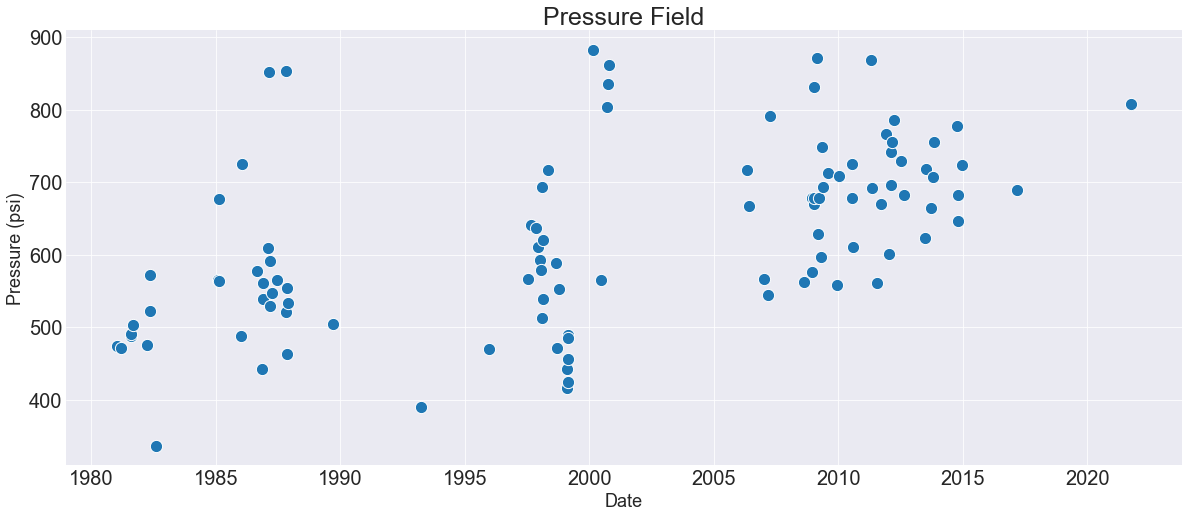

In [32]:
# Processing RFT data by sand and by segment

from openpyxl import load_workbook
import pandas as pd
import xlsxwriter
import timeit
import warnings
warnings.filterwarnings("ignore")

# read the data
# dfz = pd.read_excel("D:\GG\MINAS\Pressure\MFFM RFT Pressure Final.xlsx", sheet_name = "Pressure HM (with PI)")
# path = "D:\GG\Segment.xlsx"
# book = load_workbook(path)
# writer = pd.ExcelWriter(path, engine = "openpyxl") 
# writer.book = book

# create data in .xlsx format for input to the .vol format converter
df = pd.read_excel("D:\GG\MINAS\MFFM RFT Pressure (Rev TVDSS).xlsx", sheet_name = "Pressure HM (with PI) (2)")
df = df.groupby(["UWI","TEST_DATE"]).max().reset_index()
df = df.sort_values(by=['UWI','TEST_DATE'])
visualize_all(df)
dfk = pd.DataFrame()
dfk['Name'] = df['UWI']
dfk['Day'] = df['TEST_DATE'].dt.day
dfk['Month'] = df['TEST_DATE'].dt.month
dfk['Year'] = df['TEST_DATE'].dt.year
dfk['Pressure'] = df['DATUM PRESSURE']
dfk.loc[dfk['Name'].str.contains("MINA", case=False), "Name"] = str(i)
dfk.loc[len(dfk.index)] = ["1","","","",""]
dfk.to_excel(writer, sheet_name = str(i), index = False)

writer.save()
writer.close()

# convert excel to .vol format
start = timeit.default_timer()

wb = xlsxwriter.Workbook(r"D:\GG\Pressure by Segment.xlsx")

for segment in dfz["SEGMENT"].unique()[1:]:
    if segment == "ALL":
        pass
    else: 
        sheet1 = wb.add_worksheet(str(segment))

        row_count = 3
        df_pressure = pd.read_excel(path, sheet_name = str(segment))

        sheet1.write(0, 0, '*FIELD')
        sheet1.write(1, 0, '*DAY')
        sheet1.write(1, 1, '*MONTH')
        sheet1.write(1, 2, '*YEAR')
        sheet1.write(1, 3, '*PRESS')
        sheet1.write(2, 0, '*NAME')

        for i in df_pressure.index :
            sheet1.write(row_count, 0, int(df_pressure['Day'][i]))
            sheet1.write(row_count, 1, int(df_pressure['Month'][i]))
            sheet1.write(row_count, 2, int(df_pressure['Year'][i]))
            sheet1.write(row_count, 3, int(df_pressure['Pressure'][i]))

            if i == 1 :
                sheet1.write(2, 1, '"'+str(df_pressure['Name'][i])+'"')
            
            if str(df_pressure['Name'][i+1]) == '1' : 
                break

            if str(df_pressure['Name'][i]) != str(df_pressure['Name'][i+1]) :
                row_count+=2
                sheet1.write(row_count, 0, '*NAME')
                sheet1.write(row_count, 1, '"'+str(df_pressure['Name'][i+1])+'"')
                row_count+=1

            elif str(df_pressure['Name'][i]) == str(df_pressure['Name'][i+1]) :
                row_count+=1

wb.close()

stop = timeit.default_timer()
print('Time: ', stop - start)

In [3]:
dfz = pd.read_excel("D:\GG\MINAS\Pressure\MFFM RFT Pressure Final.xlsx", sheet_name = "Pressure HM (with PI)")

In [5]:
dfz["SEGMENT"].unique()

array(['ALL', 'MAIN', 'NW'], dtype=object)

In [11]:
# Processing RFT data by sand and by segment

from openpyxl import load_workbook
import pandas as pd
import xlsxwriter
import timeit
import warnings
warnings.filterwarnings("ignore")

# read the data
dfz = pd.read_excel("D:\GG\MINAS\MFFM RFT Pressure (Rev TVDSS).xlsx", sheet_name = "Pressure HM (with PI)")
path = "D:\GG\Seg.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = "openpyxl") 
writer.book = book

# create data in .xlsx format for input to the .vol format converter
for i in dfz["SEGMENT"].unique()[1:]:

    df = pd.read_excel("D:\GG\MINAS\MFFM RFT Pressure (Rev TVDSS).xlsx", sheet_name = "Pressure HM (with PI)")
    df = df.groupby(["SEGMENT","UWI","TEST_DATE"]).max('DATUM PRESSURE').reset_index()
    df = df[((df["SEGMENT"]==i)|(df["SEGMENT"]=="ALL"))]
    # visualize_segment(df)
    dfk = pd.DataFrame()
    dfk['Name'] = df['UWI']
    dfk['Day'] = df['TEST_DATE'].dt.day
    dfk['Month'] = df['TEST_DATE'].dt.month
    dfk['Year'] = df['TEST_DATE'].dt.year
    dfk['Pressure'] = df['DATUM PRESSURE']
    dfk.loc[dfk['Name'].str.contains("MINA", case=False), "Name"] = str(i)
    dfk.loc[len(dfk.index)] = ["1","","","",""]
    dfk.to_excel(writer, sheet_name = str(i), index = False)

writer.save()
writer.close()

# convert excel to .vol format
start = timeit.default_timer()

wb = xlsxwriter.Workbook(r"D:\GG\Pressure Segment Rev.xlsx")

for segment in dfz["SEGMENT"].unique()[1:]:
    if segment == "ALL":
        pass
    else: 
        sheet1 = wb.add_worksheet(str(segment))

        row_count = 3
        df_pressure = pd.read_excel(path, sheet_name = str(segment))

        sheet1.write(0, 0, '*FIELD')
        sheet1.write(1, 0, '*DAY')
        sheet1.write(1, 1, '*MONTH')
        sheet1.write(1, 2, '*YEAR')
        sheet1.write(1, 3, '*PRESS')
        sheet1.write(2, 0, '*NAME')

        for i in df_pressure.index :
            sheet1.write(row_count, 0, int(df_pressure['Day'][i]))
            sheet1.write(row_count, 1, int(df_pressure['Month'][i]))
            sheet1.write(row_count, 2, int(df_pressure['Year'][i]))
            sheet1.write(row_count, 3, int(df_pressure['Pressure'][i]))

            if i == 1 :
                sheet1.write(2, 1, '"'+str(df_pressure['Name'][i])+'"')
            
            if str(df_pressure['Name'][i+1]) == '1' : 
                break

            if str(df_pressure['Name'][i]) != str(df_pressure['Name'][i+1]) :
                row_count+=2
                sheet1.write(row_count, 0, '*NAME')
                sheet1.write(row_count, 1, '"'+str(df_pressure['Name'][i+1])+'"')
                row_count+=1

            elif str(df_pressure['Name'][i]) == str(df_pressure['Name'][i+1]) :
                row_count+=1

wb.close()

stop = timeit.default_timer()
print('Time: ', stop - start)

Time:  0.08115222500055097


# Find Average Pressure from PBU/SBHP data and Convert It to .VOL format (by Segment by Sand)

In [ ]:
# Processing RFT data by sand and by segment

from openpyxl import load_workbook
import pandas as pd
import xlsxwriter
import timeit
import warnings
warnings.filterwarnings("ignore")

# read the data
dfz = pd.read_excel("D:\GG\MINAS\Pressure\Pressure PBU and SHBP\PRESSURE PBU dan SBHP MFFM 2022 2.xlsx", sheet_name = "SBHP Selected")
path = r"D:\GG\MINAS\Pressure\Pressure PBU and SHBP\SBHP segment sand.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = "openpyxl") 
writer.book = book

# create data in .xlsx format for input to the .vol format converter
for x in dfz["SEGMENT"].unique():
    for i in dfz["SURVEY_SAND"].unique():
        if x == "NW" and i == "BK":
            pass
        else:
            df = pd.read_excel("D:\GG\MINAS\Pressure\Pressure PBU and SHBP\PRESSURE PBU dan SBHP MFFM 2022 2.xlsx", sheet_name = "SBHP Selected")
            df = df.groupby(["SEGMENT","SURVEY_SAND","UWI","TEST_DATE"]).mean().reset_index()
            df = df.dropna()
            df = df.sort_values(by = "TEST_DATE")
            df = df[(df["SURVEY_SAND"] == i) & (df["SEGMENT"] == x)]
            visualize_sand_segment2(df)
            dfk = pd.DataFrame()
            dfk['Name'] = df['UWI'] 
            dfk['Day'] = df['TEST_DATE'].dt.day
            dfk['Month'] = df['TEST_DATE'].dt.month
            dfk['Year'] = df['TEST_DATE'].dt.year
            dfk['Pressure'] = df['DATUM_PRESS']
            dfk.loc[dfk['Name'].str.contains("MINA", case = False), "Name"] = str(i)
            dfk.loc[len(dfk.index)] = ["1","","","",""]
            dfk.to_excel(writer, sheet_name = str(i) + "_" + str(x) , index = False)

writer.save()
writer.close()

# convert excel to .vol format
start = timeit.default_timer()

wb = xlsxwriter.Workbook(r"D:\GG\Minas\SBHP by Sand by Segment (VOL).xlsx")

for segment in dfz["SEGMENT"].unique():
    for sand in dfz["SURVEY_SAND"].unique():
        if segment == "NW" and sand == "BK":
            pass
        else:
            sheet1 = wb.add_worksheet(str(sand) + "_" + str(segment))

            row_count = 3
            df_pressure = pd.read_excel(path, sheet_name = str(sand) + "_" + str(segment))

            sheet1.write(0, 0, '*FIELD')
            sheet1.write(1, 0, '*DAY')
            sheet1.write(1, 1, '*MONTH')
            sheet1.write(1, 2, '*YEAR')
            sheet1.write(1, 3, '*PRESS')
            sheet1.write(2, 0, '*NAME')

            for i in df_pressure.index :
                sheet1.write(row_count, 0, int(df_pressure['Day'][i]))
                sheet1.write(row_count, 1, int(df_pressure['Month'][i]))
                sheet1.write(row_count, 2, int(df_pressure['Year'][i]))
                sheet1.write(row_count, 3, int(df_pressure['Pressure'][i]))

                if i == 1 :
                    sheet1.write(2, 1, '"'+str(df_pressure['Name'][i])+'"')
                

                if str(df_pressure['Name'][i+1]) == '1' : 
                    break

                if str(df_pressure['Name'][i]) != str(df_pressure['Name'][i+1]) :
                    row_count+=2
                    sheet1.write(row_count, 0, '*NAME')
                    sheet1.write(row_count, 1, '"'+str(df_pressure['Name'][i+1])+'"')
                    row_count+=1

                elif str(df_pressure['Name'][i]) == str(df_pressure['Name'][i+1]) :
                    row_count+=1

wb.close()

stop = timeit.default_timer()
print('Time: ', stop - start)

# Find Average Pressure from PBU/SBHP data and Convert It to .VOL format (FIELD)

In [ ]:
# Processing RFT data by sand and by segment

from openpyxl import load_workbook
import pandas as pd
import xlsxwriter
import timeit
import warnings
warnings.filterwarnings("ignore")

# read the data
dfz = pd.read_excel("D:\GG\MINAS\Pressure\Pressure PBU and SHBP\PRESSURE PBU dan SBHP MFFM 2022 2.xlsx", sheet_name = "SBHP Selected")
path = r"D:\GG\MINAS\Pressure\Pressure PBU and SHBP\SBHP FIELD.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = "openpyxl") 
writer.book = book

# create data in .xlsx format for input to the .vol format converter
df = pd.read_excel("D:\GG\MINAS\Pressure\Pressure PBU and SHBP\PRESSURE PBU dan SBHP MFFM 2022 2.xlsx", sheet_name = "SBHP Selected")
df = df.groupby(["UWI","TEST_DATE"]).mean().reset_index()

# visualize_sand_segment2(df)
dfk = pd.DataFrame()
dfk['Name'] = df['UWI'] 
dfk['Day'] = df['TEST_DATE'].dt.day
dfk['Month'] = df['TEST_DATE'].dt.month
dfk['Year'] = df['TEST_DATE'].dt.year
dfk['Pressure'] = df['DATUM_PRESS']
dfk.loc[dfk['Name'].str.contains("MINA", case = False), "Name"] = "FIELD"
dfk.loc[len(dfk.index)] = ["1","","","",""]
dfk.to_excel(writer, sheet_name = "FIELD", index = False)

writer.save()
writer.close()

# convert excel to .vol format
start = timeit.default_timer()

wb = xlsxwriter.Workbook(r"D:\GG\Minas\SBHP (VOL).xlsx")
sheet1 = wb.add_worksheet("FIELD")

row_count = 3
df_pressure = pd.read_excel(path, sheet_name = "FIELD")

sheet1.write(0, 0, '*FIELD')
sheet1.write(1, 0, '*DAY')
sheet1.write(1, 1, '*MONTH')
sheet1.write(1, 2, '*YEAR')
sheet1.write(1, 3, '*PRESS')
sheet1.write(2, 0, '*NAME')

for i in df_pressure.index :
    sheet1.write(row_count, 0, int(df_pressure['Day'][i]))
    sheet1.write(row_count, 1, int(df_pressure['Month'][i]))
    sheet1.write(row_count, 2, int(df_pressure['Year'][i]))
    sheet1.write(row_count, 3, int(df_pressure['Pressure'][i]))

    if i == 1 :
        sheet1.write(2, 1, '"'+str(df_pressure['Name'][i])+'"')
    

    if str(df_pressure['Name'][i+1]) == '1': 
        break

    if str(df_pressure['Name'][i]) != str(df_pressure['Name'][i+1]) :
        row_count+=2
        sheet1.write(row_count, 0, '*NAME')
        sheet1.write(row_count, 1, '"'+str(df_pressure['Name'][i+1])+'"')
        row_count+=1

    elif str(df_pressure['Name'][i]) == str(df_pressure['Name'][i+1]) :
        row_count+=1

wb.close()

stop = timeit.default_timer()
print('Time: ', stop - start)

# Create Perforation Format for Splitting Input


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_excel("D:\GG\MINAS\Splitting\Komplesi Ready.xlsx", sheet_name="Sheet2")
df['UNITS FIELD'] = df['UNITS FIELD'].str.replace("\"", "")

i = 0
x = 0
df['Well'] = np.nan

while i <= 198878:
    
    if "WELLNAME" in str(df['UNITS FIELD'][i]) and "WELLNAME" in str(df['UNITS FIELD'][i+1]):
    
        df = df.drop(index = i, axis=0)

        i += 1
        x = i

    else:

        while x <= 198878: 
            
            if "perforation" in str(df['UNITS FIELD'][x+1]):
                df['Well'].loc[x+1] = df['UNITS FIELD'][i][9:]
                x += 1
                print(df['UNITS FIELD'][i][9:])
            elif "squeeze" in str(df['UNITS FIELD'][x+1]):
                df['Well'].loc[x+1] = df['UNITS FIELD'][i][9:]
                x += 1
                print(df['UNITS FIELD'][i][9:])
            elif "plug" in str(df['UNITS FIELD'][x+1]):
                df['Well'].loc[x+1] = df['UNITS FIELD'][i][9:]
                x += 1
                print(df['UNITS FIELD'][i][9:])
            else:
                break 
            
        df = df.drop(index = i, axis=0)

        x = x + 1
        i = x
        print(i,x) 
    
    if i == 198878:
        break

df.reset_index()

In [ ]:
df.to_excel("D:\GG\MINAS\Perfo2.xlsx", index = False)

# Writing User Edit for Pseudopressure RFT Data for FM in Petrel 

In [3]:
import pandas as pd
import datetime as dt
import xlsxwriter as xw

# read and tranform list of RFT data 
df = pd.read_excel("D:\GG\MINAS\Pressure\MFFM RFT Pressure Final.xlsx", sheet_name = "Pressure HM")
df.sort_values(by = "TEST_DATE").reset_index(drop=True)
df = df.groupby(["TEST_DATE", "GRID_NAME"]).mean().reset_index()
df['TEST_DATE'] = df['TEST_DATE'].dt.strftime('%d-%b-%Y')

# write the user edit format within Excel
wb = xw.Workbook(r'D:\GG\MINAS\Pressure\User Edit RFT.xlsx')
sheet = wb.add_worksheet('User Edit RFT')

sheet.write(0, 0, "######################################")
sheet.write(1, 0, "# IXFVERSION: 2019.3 Petrel") 
sheet.write(2, 0, "######################################")
sheet.write(4, 0, "START")

rownum = 7

for i in df['TEST_DATE'].unique():
    
    sheet.write(rownum, 0, "DATE")
    sheet.write(rownum, 1, "\"" + str(i) + "\"")
    sheet.write(rownum + 2, 0, "RFTPLTReport")
    sheet.write(rownum + 2, 1, "\"RFTPLTReport\"")
    sheet.write(rownum + 2, 2, "[") 
    sheet.write(rownum + 3, 1, "WellNames")
    sheet.write(rownum + 3, 2, "WellRFTFlags")
    sheet.write(rownum + 3, 3, "WellPLTFlags")
    sheet.write(rownum + 3, 4, "WellSegmentFlags")

    if len(df[df['TEST_DATE'] == i]) >= 1:
        
        j = 1
        while j <= len(df[df['TEST_DATE'] == i]):

            sheet.write(rownum + 3 + j, 1,  "\"" + str(df[df['TEST_DATE'] == i]["GRID_NAME"].unique()[j-1]) + "\"")
            sheet.write(rownum + 3 + j, 2, "\"True\"")
            sheet.write(rownum + 3 + j, 3, "\"False\"")
            sheet.write(rownum + 3 + j, 4, "\"False\"")
 
            j += 1
    
    sheet.write(rownum + 3 + j, 0, "]")
    sheet.write(rownum + 5 + j, 0, "RFTPLTReport")
    sheet.write(rownum + 5 + j, 1, "\"" + "RFTPLTReport" + "\"")
    sheet.write(rownum + 5 + j, 2, "{")
    sheet.write(rownum + 6 + j, 0, "Frequency=ONE_TARGET_TIME")
    sheet.write(rownum + 7 + j, 0, "Period=1")
    sheet.write(rownum + 8 + j, 0, "On=\"True\"")
    sheet.write(rownum + 9 + j, 0, "FileFormat=BINARY")
    sheet.write(rownum + 10 + j, 0, "Units=ECLIPSE_FIELD")
    sheet.write(rownum + 11 + j, 0, "}")

    rownum = rownum + 13 + j

wb.close()

# Converter from xlsx to .VOL format

In [ ]:
from openpyxl import load_workbook
import pandas as pd
import xlsxwriter
import timeit
import warnings
warnings.filterwarnings("ignore")

# read the data
start = timeit.default_timer()

df = pd.read_excel("D:\GG\MINAS\Pressure\MFFM RFT Pressure Final.xlsx", sheet_name = "Pressure HM")
df = df.sort_values(by = "TEST_DATE")
dfk = pd.DataFrame()
dfk['Name'] = df['GRID_NAME'] 
dfk['Day'] = df['TEST_DATE'].dt.day
dfk['Month'] = df['TEST_DATE'].dt.month
dfk['Year'] = df['TEST_DATE'].dt.year
dfk['Pressure'] = df['DATUM_PRESSURE']
dfk.loc[len(dfk.index)] = ["1","","","",""]
dfk.to_excel("D:\GG\MINAS\Pressure\Pressure HM Raw.xlsx", sheet_name = "FIELD", index = False)

wb = xlsxwriter.Workbook(r"D:\GG\Minas\Raw (Vol).xlsx")
sheet1 = wb.add_worksheet("FIELD")

row_count = 3
df_pressure = pd.read_excel("D:\GG\MINAS\Pressure\Pressure HM Raw.xlsx", sheet_name = "FIELD")

sheet1.write(0, 0, '*FIELD')
sheet1.write(1, 0, '*DAY')
sheet1.write(1, 1, '*MONTH')
sheet1.write(1, 2, '*YEAR')
sheet1.write(1, 3, '*PRESS')
sheet1.write(2, 0, '*NAME')

for i in df_pressure.index :
    sheet1.write(row_count, 0, int(df_pressure['Day'][i]))
    sheet1.write(row_count, 1, int(df_pressure['Month'][i]))
    sheet1.write(row_count, 2, int(df_pressure['Year'][i]))
    sheet1.write(row_count, 3, int(df_pressure['Pressure'][i]))

    if i == 1 :
        sheet1.write(2, 1, '"'+str(df_pressure['Name'][i])+'"')
    

    if str(df_pressure['Name'][i+1]) == '1': 
        break

    if str(df_pressure['Name'][i]) != str(df_pressure['Name'][i+1]) :
        row_count+=2
        sheet1.write(row_count, 0, '*NAME')
        sheet1.write(row_count, 1, '"'+str(df_pressure['Name'][i+1])+'"')
        row_count+=1

    elif str(df_pressure['Name'][i]) == str(df_pressure['Name'][i+1]) :
        row_count+=1

wb.close()

stop = timeit.default_timer()
print('Time: ', stop - start)

# Create 45 Degree Plot with Hovering Anotations

### Cara 1

In [32]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

#read the data
df = pd.read_excel("D:\GG\MINAS\Crossplot per Segment Case 97_Rev.xlsx", sheet_name = "Crossplot 3")

for segment in df["Segment"].unique():
    # read the data
    df = pd.read_excel("D:\GG\MINAS\Crossplot per Segment Case 97_Rev.xlsx", sheet_name = "Crossplot 3")
    df = df[(df["Segment"] == segment)]
    fig = px.scatter(df, x = "Observed", y = "Simulation", hover_name = "Well", color = "Percentage", title = str(segment), 
    hover_data = ["Missmatch"], template = "plotly_dark")
    # fig2 = px.line(df, df["Observed"], df["Observed2"], template = "plotly_dark")
    # fig = go.Figure(data = fig1.data + fig2.data, template="plotly_dark")
    fig.show()

### Cara 2 (Per Segment)

In [2]:
import plotly.graph_objects as go
import pandas as pd

#read the data
df = pd.read_excel("D:\GG\MINAS\Crossplot per Segment Case 97_Rev.xlsx", sheet_name = "Crossplot 3")

for segment in df["Segment"].unique():
    
    # read the data
    df = pd.read_excel("D:\GG\MINAS\Crossplot per Segment Case 97_Rev.xlsx", sheet_name = "Crossplot 3")
    df = df[(df["Segment"] == segment)]
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(x = df["Observed"], y = df["Simulation"], mode = 'markers', 
                    hovertext = df["Well"], marker = dict(
                        color = df["Percentage"],
                        colorscale = "Inferno",
                        showscale = True
                    ), showlegend = False))

    fig.add_trace(go.Scatter(x = df["Observed"], y = df["Observed2"], mode = 'lines', 
                    marker = dict(
                        color = "darkgrey"
                    ), showlegend = False))

    fig.update_layout(title_text = "Liquid Missmatch " + segment + " Segment")
    fig.update_xaxes(title = "Observed")
    fig.update_yaxes(title = "Simualtion")
    fig.layout.template = 'plotly_dark'

    fig.show()

### Cara 3 (Per Grid)

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import plotly.subplots as make_subplots

#read the data
df = pd.read_excel("D:\GG\MINAS\Crossplot per Segment Case 97_Rev.xlsx", sheet_name = "Crossplot 4")
df = df.sort_values(by = "Grid")

# fig = make_subplots(rows=11, cols=4)

for grid in df["Grid"].unique():
    
    # read the data
    df = pd.read_excel("D:\GG\MINAS\Crossplot per Segment Case 97_Rev.xlsx", sheet_name = "Crossplot 4")
    df = df[(df["Grid"] == grid)]
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(x = df["Observed"], y = df["Simulation"], mode = 'markers+text', 
                    hovertext = df["Well"], marker = dict(
                        color = df["Percentage"],
                        colorscale = "Inferno",
                        showscale = True
                    ), showlegend = False,
                    text=df['Well'],
                    textposition="bottom center"))

    fig.add_trace(go.Scatter(x = df["Observed"], y = df["Observed2"], mode = 'lines', 
                    marker = dict(
                        color = "darkgrey"
                    ), showlegend = False))

    fig.update_layout(title_text = "Liquid Missmatch in " + grid + " (" + str(len(df)) + " Wells)", height=500, width=500)
    fig.update_xaxes(title = "Observed")
    fig.update_yaxes(title = "Simualtion")
    fig.layout.template = 'plotly_dark'

    fig.show()

### Cara 4 (With Subplots)

In [1]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

#read the data
df = pd.read_excel("D:\GG\MINAS\Crossplot per Segment Case 97_Rev.xlsx", sheet_name = "Crossplot 4")
df = df.sort_values(by = "Grid")

fig = make_subplots(rows = 11, cols = 4, subplot_titles = (["Liquid Missmatch in " + grid for grid in df["Grid"].unique()]))

j = 1
x = 1

for grid in df["Grid"].unique():

    if j % 5 == 0:
        j = 1
        x += 1
    else:
        pass
    
    # read the data
    df = pd.read_excel("D:\GG\MINAS\Crossplot per Segment Case 97_Rev.xlsx", sheet_name = "Crossplot 4")
    df = df[(df["Grid"] == grid)]
    
    fig.add_trace(go.Scatter(x = df["Observed"], y = df["Simulation"], mode = 'markers',  hovertext = df["Well"], showlegend = False,
                    marker = dict(
                        color = df["Percentage"],
                        colorscale = "Inferno"
                    ),text = df['Well'], 
                    textposition = "bottom center"), 
                    row = x, col = j)

    fig.add_trace(go.Scatter(x = df["Observed"], y = df["Observed2"], mode = 'lines', showlegend = False),
                    row = x, col = j)

    fig.update_layout(title_text = "Liquid Missmatch (Simulation vs Observed)", height=5000, width=1850, colorscale_sequential = 'Inferno')
    fig.layout.template = 'plotly_dark'

    j += 1

fig.show()

### Cara 5

In [72]:
import plotly.express as px
import pandas as pd

#read the data
df = pd.read_excel("D:\GG\MINAS\Crossplot per Segment Case 97_Rev.xlsx", sheet_name = "Crossplot 4")
df = df.sort_values(by = "Grid")

fig = px.scatter(df, x = df['Observed'], y = df['Simulation'], facet_col = df['Grid'], hover_name = df['Well'], hover_data = ['Missmatch'],
                    facet_col_wrap = 4, facet_row_spacing = 0.01)

j = 1
x = 1

for a in range(0,44):

    if x == 11 and j == 4:
        pass
    elif j % 5 == 0:
        j = 1 
        x += 1
    else:
        pass

    reference_line = go.Scatter(x = df['Observed'],
                                y = df['Observed2'],
                                mode = "lines",
                                line = go.scatter.Line(color="gray"),
                                showlegend=False)
                        
    fig.add_trace(reference_line, row = x, col = j)

    j += 1

fig.update_layout(title_text = "Liquid Missmatch (Simulation vs Observed)", height=4000, width=1850, colorscale_sequential = 'Inferno')
fig.layout.template = 'plotly_dark'

fig.show()


### Cara 6 (Case 102)

In [84]:
import plotly.graph_objects as go
import pandas as pd

#read the data
df = pd.read_excel("D:\GG\MINAS\Simulation vs Observed Liquid Cum Case 102.xlsx", sheet_name = "Viz")
    
fig = go.Figure()

fig.add_trace(go.Scatter(x = df["Observed"], y = df["Simulation"], mode = 'markers',
                hovertext = df["Identifier"], marker = dict(
                    color = df["Difference"],
                    colorscale = "Inferno",
                    showscale = True
                ), showlegend = False))

fig.add_trace(go.Scatter(x = df["Observed"], y = df["Observed"], mode = 'lines', 
                marker = dict(
                    color = "darkgrey"
                ), showlegend = False))

fig.update_layout(title_text = "Liquid Missmatch (case 102)", height = 1000)
fig.update_xaxes(title = "Observed")
fig.update_yaxes(title = "Simuataion")
fig.layout.template = 'plotly_dark'

fig.show()

In [91]:
import plotly.graph_objects as go
import pandas as pd

#read the data
df = pd.read_excel("D:\GG\MINAS\Simulation vs Observed Liquid Cum HM_MFFM_104thRUN.xlsx", sheet_name = "104")
    
fig = go.Figure()

fig.add_trace(go.Scatter(x = df["Observed"], y = df["Simulation"], mode = 'markers',
                hovertext = df["Well"], marker = dict(
                    color = df["Difference"],
                    colorscale = "Viridis",
                    showscale = True
                ), showlegend = False))

fig.add_trace(go.Scatter(x = df["Observed"], y = df["Observed"], mode = 'lines', 
                marker = dict(
                    color = "red"
                ), showlegend = False))

fig.update_layout(title_text = "Liquid Missmatch (case 104)", height = 1000)
fig.update_xaxes(title = "Observed")
fig.update_yaxes(title = "Simuataion")
fig.layout.template = 'plotly_white'

fig.show()

# Restructuring Data Final Completion

In [ ]:
import pandas as pd

df = pd.read_excel("D:\GG\MINAS\Perfo2.xlsx", sheet_name = "Sheet1")
df = df.sort_values(by = ["Name", "Completion", "Date", "Top"]) 
df.to_excel("D:\GG\MINAS\Splitting\Final Completion.xlsx")

# Creating "P" Template for Splitting Prod/Inj

In [9]:
import pandas as pd
import xlsxwriter as xr
import xlwings as xw

df_prod_inj = pd.read_excel(r"D:\GG\MINAS\prod_inj.xlsx")
df_marker = pd.read_excel(r"D:\GG\MINAS\marker.xlsx")

# Explore Pressure RFT

In [1]:
import pandas as pd

df = pd.read_excel("D:\GG\MINAS\Pressure\Copy of MFFM RFT Pressure Final.xlsx", sheet_name = "Pressure HM")

In [2]:
df

UWI  B GRID_NAME  TEST_DATE MISC_TEST_TYPE  TOP_DEPTH  \
0      MINA00442  1      5E77 1981-01-08            RFT       2373   
1      MINA00442  1      5E77 1981-01-08            RFT       2446   
2      MINA00442  1      5E77 1981-01-08            RFT       2471   
3      MINA00442  1      5E77 1981-01-08            RFT       2495   
4      MINA00442  1      5E77 1981-01-08            RFT       2516   
..           ... ..       ...        ...            ...        ...   
831  MINA01984D1  1     4C55N 2021-10-09            XPT       2302   
832  MINA01984D1  1     4C55N 2021-10-09            XPT       2304   
833  MINA01984D1  1     4C55N 2021-10-09            XPT       2315   
834  MINA01984D1  1     4C55N 2021-10-09            XPT       2432   
835  MINA01984D1  1     4C55N 2021-10-09            XPT       2449   

     BOTTOM_DEPTH  TVDSS (FT)  FORMATION_PRESSURE     STATUS  ...     KB  \
0            2373         NaN               298.0  Good_Test  ...  193.5   
1            2446         NaN               320.0  Good_Test  ...  193.5   
2            2471         NaN               371.0  Good_Test  ...  193.5   
3            2495         NaN               380.0  Good_Test  ...  193.5   
4            2516         NaN               388.0  Good_Test  ...  193.5   
..            ...         ...                 ...        ...  ...    ...   
831          2302         NaN               763.4  Good Test  ...  217.0   
832          2304         NaN               764.2  Good Test  ...  217.0   
833          2315         NaN               768.4  Good Test  ...  217.0   
834          2432         NaN               826.7  Good Test  ...  217.0   
835          2449         NaN               831.7  Good Test  ...  217.0   

        TVD   TVDSS Datum Depth  Selisih depth     PG  DATUM_PRESSURE  \
0       NaN  2179.5        2106          -73.5  0.308        275.3620   
1       NaN  2252.5        2106         -146.5  0.308        274.8780   
2       NaN  2277.5        2106         -171.5  0.308        318.1780   
3       NaN  2301.5        2106         -195.5  0.308        319.7860   
4       NaN  2322.5        2106         -216.5  0.308        321.3180   
..      ...     ...         ...            ...    ...             ...   
831  2609.8  2392.8        2106         -286.8  0.308        675.0656   
832  2609.8  2392.8        2106         -286.8  0.308        675.8656   
833  2609.8  2392.8        2106         -286.8  0.308        680.0656   
834  2609.8  2392.8        2106         -286.8  0.308        738.3656   
835  2609.8  2392.8        2106         -286.8  0.308        743.3656   

          PGF  Year  Grid  
0    0.126342  1981    5E  
1    0.122032  1981    5E  
2    0.139705  1981    5E  
3    0.138947  1981    5E  
4    0.138350  1981    5E  
..        ...   ...   ...  
831  0.282124  2021    4C  
832  0.282458  2021    4C  
833  0.284213  2021    4C  
834  0.308578  2021    4C  
835  0.310668  2021    4C  

[836 rows x 24 columns]

In [181]:
df2 = df.groupby(["Grid","GRID_NAME","TEST_DATE","Year", ]).mean().reset_index()

In [175]:
df2 = df2.groupby("Grid").count().reset_index()

In [178]:
df2[["Grid","GRID_NAME"]]

Grid  GRID_NAME
0   10C          1
1   10D          1
2    1D          1
3    2D          5
4    2E          1
5    3A          1
6    3B          2
7    3C          3
8    3D          2
9    3E          2
10   4A          2
11   4B          4
12   4C          2
13   4D          2
14   4E          3
15   5A          1
16   5B          9
17   5D          2
18   5E          6
19   6B          1
20   6C          1
21   6D          1
22   6E          3
23   6F          3
24   7C          3
25   7D          6
26   7E         11
27   7F          2
28   8D         11
29   8E          5
30   9D          3
31   9E          3

In [152]:
import plotly.graph_objects as go
import pandas as pd

#read the data
fig = go.Figure()

fig = px.scatter(df, x = df["TEST_DATE"], y = df["DATUM_PRESSURE"], color = df["Year"], hover_name = df['GRID_NAME'], hover_data = ['Grid'])

# fig.add_trace(go.Scatter(x = df["TEST_DATE"], y = df["DATUM_PRESSURE"], mode = 'markers',
#                 hovertext = df["GRID_NAME"], marker = dict(
#                     color = df["Year"],
#                     colorscale = "Viridis",
#                     showscale = True
#                 ), showlegend = False))

fig.update_layout(title_text = "Pressure Key Well RFT", height = 800, width = 1500)
fig.update_xaxes(title = "Time")
fig.update_yaxes(title = "Datum Pressure (psi)")
fig.layout.template = 'plotly_white'

fig.show()

In [146]:
df2

Grid          UWI  TEST_DATE  Year    B    TOP_DEPTH  BOTTOM_DEPTH  \
0    10C    MINA00559 1986-11-19  1986  1.0  2528.666667   2528.666667   
1    10D    MINA00560 1986-11-21  1986  1.0  2493.714286   2493.714286   
2     1D  MINA01936D1 2013-11-07  2013  1.0  2631.312500   2631.312500   
3     2D    MINA01115 1998-01-09  1998  1.0  2239.000000   2239.000000   
4     2D  MINA01828D1 2011-09-18  2011  1.0  2701.600000   2701.600000   
..   ...          ...        ...   ...  ...          ...           ...   
98    9D  MINA01388D1 2000-10-13  2000  1.0  2794.666667   2794.666667   
99    9D  MINA01819D1 2011-07-19  2011  1.0  2512.800000   2512.800000   
100   9E  MINA01513D1 2006-05-31  2006  1.0  2419.250000   2419.250000   
101   9E  MINA01846D1 2012-01-17  2012  1.0  2517.000000   2517.000000   
102   9E  MINA01924D1 2013-07-10  2013  1.0  2484.090909   2484.090909   

     TVDSS (FT)  FORMATION_PRESSURE     KB          TVD        TVDSS  \
0           NaN          514.833333  223.4          NaN  2305.266667   
1           NaN          539.571429  191.2          NaN  2302.514286   
2           NaN          642.750000  185.7  2409.064375  2223.364375   
3           NaN          560.428571  150.0          NaN  2089.000000   
4           NaN          673.000000  191.7  2285.974000  2094.274000   
..          ...                 ...    ...          ...          ...   
98          NaN          736.666667  214.4  2248.080000  2033.680000   
99          NaN          558.000000  182.1  2252.120000  2070.020000   
100         NaN          618.750000  216.0  2300.145000  2084.145000   
101         NaN          495.000000  197.1  2328.923333  2131.823333   
102         NaN          583.545455  198.8  2306.423636  2107.623636   

     Datum Depth  Selisih depth     PG  DATUM_PRESSURE       PGF  
0         2106.0    -199.266667  0.308      453.459200  0.196541  
1         2106.0    -196.514286  0.308      479.045029  0.207863  
2         2106.0    -117.364375  0.308      606.601772  0.271801  
3         2106.0      17.000000  0.308      565.664571  0.271352  
4         2106.0      11.726000  0.308      676.611608  0.323198  
..           ...            ...    ...             ...       ...  
98        2106.0      72.320000  0.308      758.941227  0.375600  
99        2106.0      35.980000  0.308      569.081840  0.276535  
100       2106.0      21.855000  0.308      625.481340  0.300353  
101       2106.0     -25.823333  0.308      487.046413  0.230939  
102       2106.0      -1.623636  0.308      583.045375  0.276487  

[103 rows x 17 columns]

In [183]:
import plotly.graph_objects as go
import pandas as pd

#read the data
fig = go.Figure()

fig = px.scatter(df2, x = df2["TEST_DATE"], y = df2["DATUM_PRESSURE"], color = df2["Year"], hover_name = df2["GRID_NAME"])

# fig.add_trace(go.Scatter(x = df["TEST_DATE"], y = df["DATUM_PRESSURE"], mode = 'markers',
#                 hovertext = df["GRID_NAME"], marker = dict(
#                     color = df["Year"],
#                     colorscale = "Viridis",
#                     showscale = True
#                 ), showlegend = False))

fig.update_layout(title_text = "Pressure Key Well RFT", height = 800, width = 1500)
fig.update_xaxes(title = "Time")
fig.update_yaxes(title = "Datum Pressure (psi)")
fig.layout.template = 'plotly_white'

fig.show()

# Check RFT Data

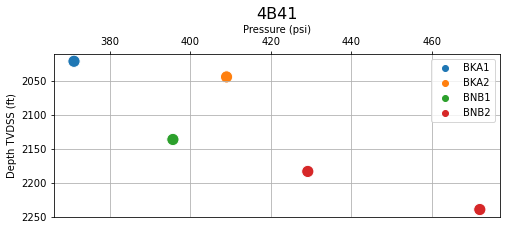

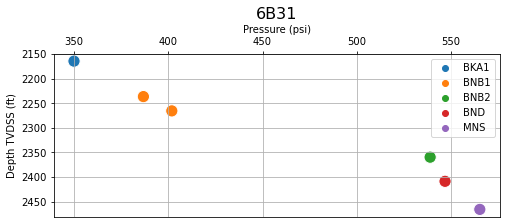

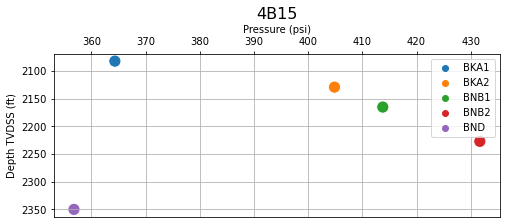

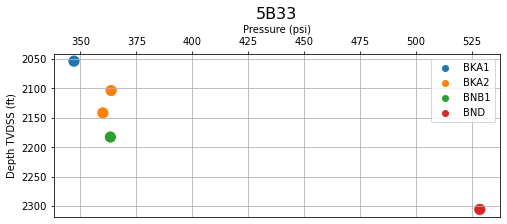

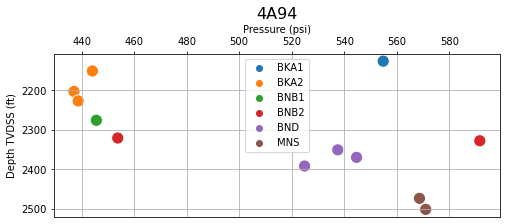

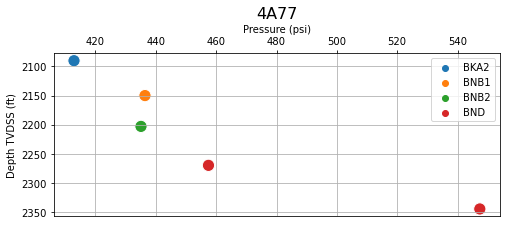

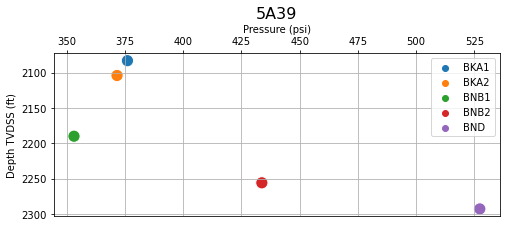

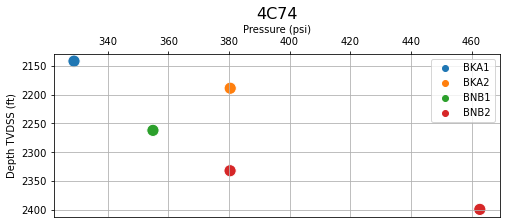

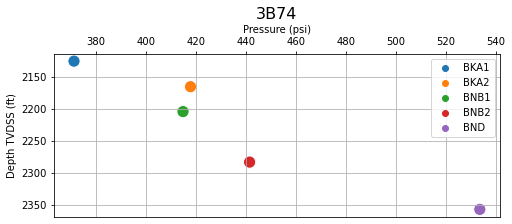

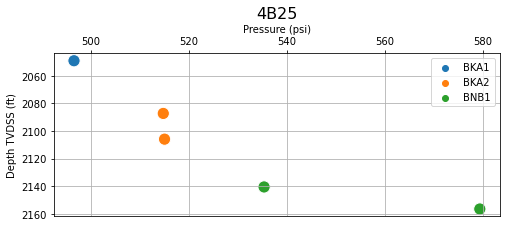

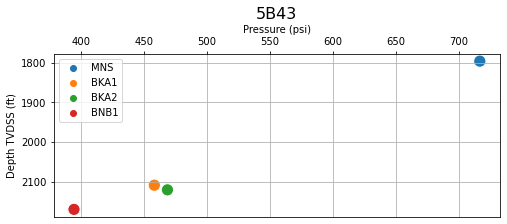

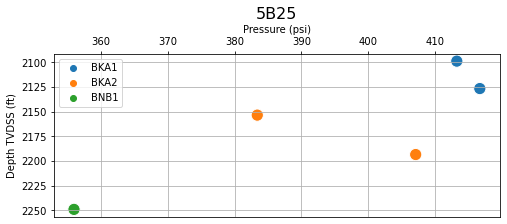

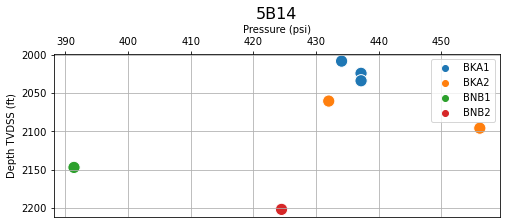

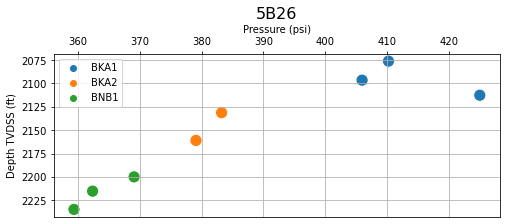

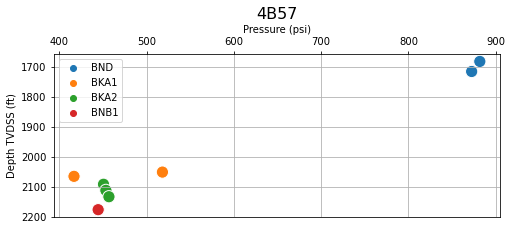

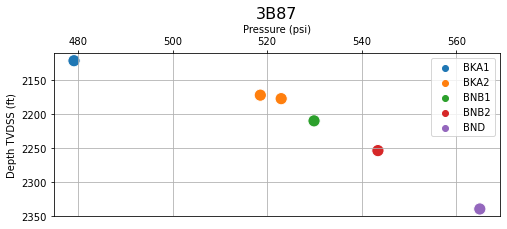

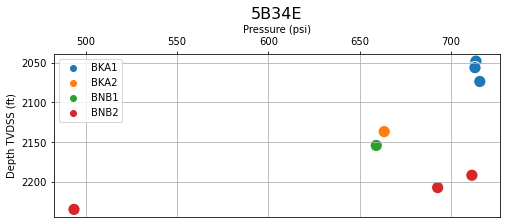

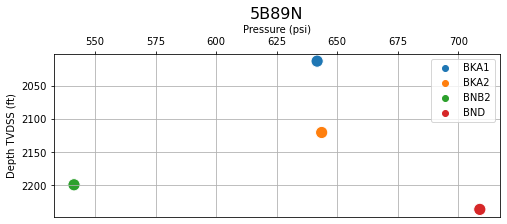

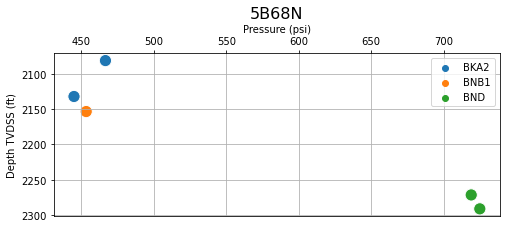

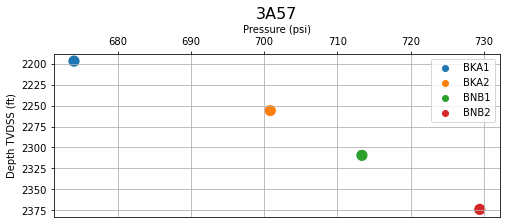

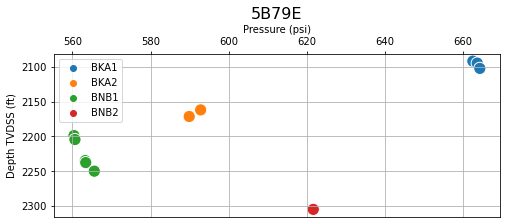

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

rft = pd.read_excel("D:\GG\MINAS\Copy of MFFM RFT Pressure Revised.xlsx",sheet_name = "Pressure HM (Filter)")
rft = rft[(rft['SEGMENT'] == "NW")]

for well in rft['GRID_NAME'].unique():
    fig, ax = plt.subplots(figsize=(8,3))
    fig = sns.scatterplot(rft[(rft['GRID_NAME']==well)]['DATUM PRESSURE REV'], rft[(rft['GRID_NAME']==well)]['TVDSS'], 
                        hue=rft[(rft['GRID_NAME']==well)]['K'], s=150)
    # fig.plot(rft[(rft['GRID_NAME']==well)]['DATUM PRESSURE REV'], rft[(rft['GRID_NAME']==well)]['TVDSS'], linestyle = "--", color = 'black')
    ax.set_xlabel('Pressure (psi)')
    ax.set_ylabel('Depth TVDSS (ft)')
    plt.gca().invert_yaxis()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.legend()
    ax.set_title(well, fontsize=16, y=1.3, pad=-14)
    plt.grid()
    plt.show()

# Find Cell Error in PRT File

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# read data
prt = pd.read_excel("D:\GG\MINAS\A9F1CAA0.xlsx", sheet_name="Sheet2")

# create blank dataframe
data = pd.DataFrame()

# create rows
data["Time"] = np.nan 
data["Well"] = np.nan
data["Pressure Cell"] = np.nan
data["Pressure Change"] = np.nan
data["Saturation Cell"] = np.nan
data["Saturation Change"] = np.nan
data["Composition Cell"] = np.nan
data["Composition Change"] = np.nan

# scrap data from PRT file that converted to excel
x = 0
a = 1
for i in prt.index:
    if "REPORT Nonlinear convergence at time" in str(prt["REPORT Run Specifications"][i]):
        while str(prt["REPORT Run Specifications"][i+5+a][0]) != "+":
            if str(prt["REPORT Run Specifications"][i+5+a]).split(" ")[2] == "|" and str(prt["REPORT Run Specifications"][i+5+a]).split(" ")[3] == "|": 
                break
            data.loc[x] = [prt["REPORT Run Specifications"][i].split(" ")[5],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[4],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[7],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[6],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[10],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[9],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[14],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[13]]
            print(prt["REPORT Run Specifications"][i].split(" ")[5], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[4], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[7], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[6], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[10], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[9], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[14], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[13])

            x += 1
            a += 1
        
        # restart a
        a = 1

# convert it to excel
data.to_excel("D:\GG\MINAS\List Well Error.xlsx")

10651.6 | 9E+23 | 193,586,5 | 31 | 238,250,15 | 1.5 | 238,250,15 | -0.0000026
10651.6 | 9E+23 | 193,586,5 | 23 | 238,250,15 | 4100 | 238,250,15 | 0.033
10651.6 | 9E+23 | 193,586,5 | 17 | 238,250,15 | 13 | 238,250,15 | 0.000000037
10651.6 | 9E+23 | 193,586,5 | 13 | 238,250,15 | 13 | 96,311,20 | -0.0000000013
10651.6 | 9E+23 | 193,586,5 | 9.7 | 238,250,15 | 13 | 96,311,20 | -0.00000000096
10651.6 | 9E+23 | 193,586,5 | 7.3 | 238,250,15 | 13 | 96,311,20 | -0.00000000072
10651.6 | 9E+23 | 193,586,5 | 5.4 | 238,250,15 | 13 | 96,311,20 | -0.00000000054
10651.6 | 9E+23 | 193,586,5 | 4.1 | 238,250,15 | 13 | 96,311,20 | -0.00000000041
10651.6 | 9E+23 | 193,586,5 | 3.1 | 238,250,15 | 13 | 96,311,20 | -0.0000000003
10651.6 | 9E+23 | 193,586,5 | 2.3 | 238,250,15 | 13 | 96,311,20 | -0.00000000023
10651.6 | 9E+23 | 193,586,5 | 1.7 | 238,250,15 | 12 | 96,311,20 | -0.00000000017
10651.6 | 9E+23 | 73,85,12 | 4.9 | 238,250,15 | 12 | 96,311,20 | -0.00000000013
10651.6 | 9E+23 | 73,85,12 | 3.1 | 238,250,15

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# read data
prt = pd.read_excel("D:\List Well Error 2.xlsx", sheet_name="Sheet2")

# create blank dataframe
data = pd.DataFrame()

# create rows
data["Time"] = np.nan 
data["Well"] = np.nan
data["Pressure Cell"] = np.nan
data["Pressure Change"] = np.nan
data["Saturation Cell"] = np.nan
data["Saturation Change"] = np.nan
data["Composition Cell"] = np.nan
data["Composition Change"] = np.nan

# scrap data from PRT file that converted to excel
x = 0
a = 1
for i in prt.index:
    if "REPORT Nonlinear convergence at time" in str(prt["REPORT Run Specifications"][i]):
        while str(prt["REPORT Run Specifications"][i+5+a][0]) != "+":
            if str(prt["REPORT Run Specifications"][i+5+a]).split(" ")[2] == "|" and str(prt["REPORT Run Specifications"][i+5+a]).split(" ")[3] == "|": 
                break
            data.loc[x] = [prt["REPORT Run Specifications"][i].split(" ")[5],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[4],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[7],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[6],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[10],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[9],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[14],
                            prt["REPORT Run Specifications"][i+5+a].split(" ")[13]]
            print(prt["REPORT Run Specifications"][i].split(" ")[5], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[4], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[7], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[6], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[10], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[9], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[14], "|",
                    prt["REPORT Run Specifications"][i+5+a].split(" ")[13])

            x += 1
            a += 1
        
        # restart a
        a = 1

# convert it to excel
data.to_excel("D:\List Well Error 2.xlsx", sheet_name="Sheet2")

10958 | 3D58 | 260,249,55 | 1.9e+02 | 246,261,15 | -5.2e+00 | 134,233,10 | 2.3e-08
10958 | 3D58 | 228,215,51 | 1.2e+02 | 238,250,15 | -1.5e+02 | 238,250,15 | -1.9e-06
10958 | 3D58 | 228,215,51 | 9.0e+01 | 134,538,6 | 1.3e+00 | 134,233,9 | 9.1e-09
10958 | 3D58 | 228,215,51 | 6.8e+01 | 134,538,6 | -1.6e+00 | 134,233,9 | 7.4e-09
10958 | 3D58 | 228,215,51 | 5.1e+01 | 253,244,15 | -1.8e+00 | 134,233,9 | -8.6e-09
10958 | 3D58 | 228,215,51 | 3.8e+01 | 134,538,6 | -4.0e+00 | 134,233,9 | -5.1e-09
10958 | 3D58 | 228,215,51 | 2.9e+01 | 134,538,6 | 1.2e+00 | 238,250,15 | 5.2e-09
10958 | 3D58 | 73,86,11 | 3.3e+01 | 134,538,6 | -3.3e+00 | 238,250,15 | 6.6e-09
10958 | 3D58 | 228,215,51 | 1.6e+01 | 134,538,6 | 1.1e+00 | 238,250,15 | 8.7e-09
10958 | 3D58 | 228,215,51 | 1.2e+01 | 134,538,6 | -2.9e+00 | 238,250,15 | 1.1e-08
10958 | 3D58 | 228,215,51 | 9.0e+00 | 134,538,6 | 1.1e+00 | 238,250,15 | 1.5e-08
10958 | 9D21 | 73,86,11 | 5.4e+01 | 134,538,6 | -5.9e+00 | 238,250,15 | 1.9e-08
10958 | 3D58 | 134,538